# suppfig rscape, info content

In [1]:
#requirements
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import os


#load AC-ID-DE

rfam_acc_id_desc = []
with open("../../datasets/Rfam14.7/Rfam.seed", encoding="latin-1") as seed:
    triplet = []
    for line in seed:
        if line.startswith("#=GF AC") or line.startswith("#=GF ID") or line.startswith("#=GF DE"):
            triplet.append(line.split("   ")[1].replace("\n", ""))
        if len(triplet) == 3:
            rfam_acc_id_desc.append(triplet)
            triplet = []
            
            
df_acc_id_desc = pd.DataFrame(rfam_acc_id_desc)
df_acc_id_desc.columns = ["rfam", "ID", "description"]
df_acc_id_desc.head(3)


,rfam,ID,description
0,RF00001,5S_rRNA,5S ribosomal RNA
1,RF00002,5_8S_rRNA,5.8S ribosomal RNA
2,RF00003,U1,U1 spliceosomal RNA


In [2]:
!ls ../../outputs/Rfam14.7/*csv

../../outputs/Rfam14.7/evalmi_cmvae_0p01.csv
../../outputs/Rfam14.7/evalmi_cmvae_0p05.csv
../../outputs/Rfam14.7/evalmi_cmvae_0p1.csv
../../outputs/Rfam14.7/evalmi_gcvae.csv
../../outputs/Rfam14.7/evalmi_nat.csv
../../outputs/Rfam14.7/evalmi_rscape_cm.csv
../../outputs/Rfam14.7/evalmi_rscape_gc.csv
../../outputs/Rfam14.7/evalmi_rscape_nat.csv


In [3]:
mi_natural = pd.read_csv("../../outputs/Rfam14.7/evalmi_rscape_nat.csv", header = 0, index_col = 0)
mi_gcvae = pd.read_csv("../../outputs/Rfam14.7/evalmi_rscape_gc.csv", header = 0, index_col = 0)
mi_cmvae = pd.read_csv("../../outputs/Rfam14.7/evalmi_rscape_cm.csv", header = 0, index_col = 0)

mi_natural.columns = [1,2,3]
mi_gcvae.columns = [1,2,3]
mi_cmvae.columns = [1,2,3]


for col in mi_natural.columns: mi_natural[col] = mi_natural[col].astype(float)
for col in mi_gcvae.columns: mi_gcvae[col] = mi_gcvae[col].astype(float)
for col in mi_cmvae.columns: mi_cmvae[col] = mi_cmvae[col].astype(float)



mi_cmvae["rfam"] = [os.path.basename(os.path.dirname(path)) for path in mi_cmvae.index]
# mi_cmvae = mi_cmvae.set_index("rfam").drop("RF02542")

mi_gcvae["rfam"] = [os.path.basename(os.path.dirname(path)) for path in mi_gcvae.index]
# mi_gcvae = mi_gcvae.set_index("rfam") #.drop("RF02542")

mi_natural["rfam"] = [os.path.basename(path).split("_")[0] for path in mi_natural.index]
# mi_natural = mi_natural.set_index("rfam") #.drop("RF02542")


for mi in [mi_natural, mi_gcvae, mi_cmvae]:
    mi[2] = mi[2]/2
    mi[3] = mi[3]/2

# print(mi_gcvae["rfam"])

rfam_selected = set(mi_cmvae.rfam).intersection(set(mi_gcvae.rfam), set(mi_natural.rfam))
mi_natural = mi_natural[mi_natural["rfam"].isin(rfam_selected)]
mi_gcvae = mi_gcvae[mi_gcvae["rfam"].isin(rfam_selected)]
mi_cmvae = mi_cmvae[mi_cmvae["rfam"].isin(rfam_selected)]

mi_natural = mi_natural.merge(df_acc_id_desc, on = "rfam")[["rfam", "ID", "description", 1, 2, 3]]
mi_gcvae = mi_gcvae.merge(df_acc_id_desc, on = "rfam")[["rfam", "ID", "description", 1, 2, 3]]
mi_cmvae = mi_cmvae.merge(df_acc_id_desc, on = "rfam")[["rfam", "ID", "description", 1, 2, 3]]

mi_natural.head(2)

,rfam,ID,description,1,2,3
0,RF00001,5S_rRNA,5S ribosomal RNA,81.115,16.746,0.0
1,RF00002,5_8S_rRNA,5.8S ribosomal RNA,99.078,12.561,0.0


median gcvae 6.9350000000000005
median cmvae 3.053749999999998
p = 3.97e-31


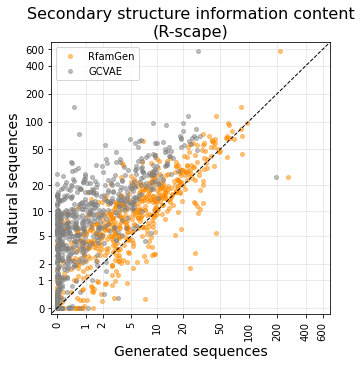

In [5]:

deg = 2
color_gcvae = "gray"    
color_cmvae = "darkorange"
alpha = 0.5
xmin = -0.2
xmax = 9.5
size = 16
ticks = [0, 1, 2, 5, 10, 20, 50, 100] + [200*i for i in range(1, 8)]

fig, ax1 = plt.subplots(figsize = (5, 5))
# ax1.scatter(mi_cmvae[deg], mi_natural[deg], alpha = 0.3, label ="RfamGen", s = size, color = "orange")
# ax1.scatter(mi_gcvae[deg], mi_natural[deg],  alpha = 0.3, label = "GCVAE", s = size, color = "gray")
ax1.plot([-100, 100], [-100, 100], color = "black", linestyle = "dashed", linewidth =1)
plt.scatter(
    np.log2(mi_cmvae[deg]+1),
    np.log2(mi_natural[deg]+1),
    alpha = alpha, label ="RfamGen", s = size, color = color_cmvae)
plt.scatter(
    np.log2(mi_gcvae[deg]+1),
    np.log2(mi_natural[deg]+1), 
    alpha = alpha, label = "GCVAE", s = size, color = color_gcvae)


plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)
plt.yticks([np.log2(t+1) for t in ticks], ticks)
plt.title("Secondary structure information content\n(R-scape)", fontsize = 16)
plt.xlabel("Generated sequences", fontsize = 14)
plt.ylabel("Natural sequences", fontsize = 14)

ax1.set_xlim(xmin, xmax)
ax1.set_ylim(xmin, xmax)
ax1.legend()
ax1.grid(alpha = 0.3)
# plt.savefig(f"../../outputs/figures/suppfigure_rscape_2nd.pdf", transparent = True)


# from scipy.stats import pearsonr
# corr_gcvae, p_gcvae = pearsonr(mi_natural[deg], mi_gcvae[deg])
# corr_cmvae, p_cmvae = pearsonr(mi_natural[deg], mi_cmvae[deg])

# print(f"GCVAE: {corr_gcvae:.2f} (p = {p_gcvae:.2e})")
# print(f"RfamGen: {corr_cmvae:.2f} (p = {p_cmvae:.2e})")

from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(mi_natural[deg]-mi_gcvae[deg], mi_natural[deg]-mi_cmvae[deg])
print("median gcvae", np.median(mi_natural[deg]-mi_gcvae[deg]))
print("median cmvae", np.median(mi_natural[deg]-mi_cmvae[deg]))
print(f"p = {p:.2e}")


,model,$\Delta$(information content)
0,RfamGen,0.146655
1,RfamGen,3.047451
2,RfamGen,4.133029
3,RfamGen,4.114034
4,RfamGen,1.166394


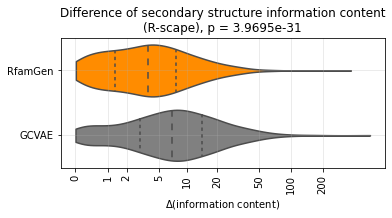

In [6]:
import seaborn as sns
from scipy.stats import mannwhitneyu

df_diff = pd.DataFrame({
    "RfamGen": np.log2(np.abs(mi_natural[deg] - mi_cmvae[deg]) + 1),
    "GCVAE": np.log2(np.abs(mi_natural[deg] - mi_gcvae[deg]) + 1),
}).melt(var_name="model", value_name="$\Delta$(information content)")
u, p = mannwhitneyu(mi_natural[deg]-mi_gcvae[deg], mi_natural[deg]-mi_cmvae[deg])


plt.figure(figsize = (6,3))
sns.violinplot(data = df_diff, y = "model", x = "$\Delta$(information content)", cut = 0, inner = "quartile", saturation = 1, palette = [color_cmvae, color_gcvae])



ticks = [0, 1, 2, 5, 10, 20, 50, 100, 200]
plt.xticks([np.log2(t+1) for t in ticks], ticks, rotation=90)


plt.ylabel("")
plt.grid(alpha = 0.3)
plt.title("Difference of secondary structure information content\n(R-scape), p = {:.4e}".format(p))
plt.subplots_adjust(top = 0.8, bottom = 0.2, left = 0.2, right = 0.95)
plt.savefig(f"../../outputs/figures/suppfigure3b_diff_rscape_2nd.pdf", transparent = True)

df_diff.head()



In [14]:
np.log2(mi_gcvae[deg]+1)

0      2.417245
1      0.000000
2      3.601340
3      4.860317
4      0.637842
         ...   
623    0.000000
624    0.000000
625    1.904773
626    0.157691
627    0.687956
Name: 2, Length: 628, dtype: float64